# WeatherPy_Walsh_Gold
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install gmaps
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
#!pip install citipy
#!pip install openweathermapy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import json
import csv
import datetime

import openweathermapy.core as owm
import os  # For getting API key from computer

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## tried to get key from os
api_key = os.environ.get('weather_api_key')

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [4]:
## Generate random latitude and longitudes
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs tuples
lat_lng_rand = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng_rand = zip(lats, lngs)

## Generate cities list from random latitudes and longitudes using citipy.nearest_city
# List for holding cities
cities = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lng_rand:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set api for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create settings dictionary for key parameters
settings = {"units": "imperial", "appid": api_key}

city_name_name = ['name','clouds.all','sys.country','dt',
                  'main.humidity','coord.lat','coord.lon','main.temp_max','wind.speed']

all_in_one = []
count = 0
rec = 0
set = 1

for city in cities:

    if count == 50:
        time.sleep(1.1)
        count = 0
        rec = 0
        set+=1
    try:
        # Openweathermap API call to get current weather for a city
        current_weather_city = owm.get_current(city, **settings)
        awesome_city = current_weather_city(*city_name_name)
        count += 1
        rec += 1

        print(f"Processing Record {rec} of Set {set} | {current_weather_city['name']}.")
        all_in_one.append(awesome_city)

    except:
        print("City not found. Skipping...")
         


Processing Record 1 of Set 1 | Butaritari.
Processing Record 2 of Set 1 | Dumai.
Processing Record 3 of Set 1 | Viedma.
Processing Record 4 of Set 1 | Qaanaaq.
Processing Record 5 of Set 1 | Rikitea.
Processing Record 6 of Set 1 | Carnarvon.
Processing Record 7 of Set 1 | Cidreira.
City not found. Skipping...
Processing Record 8 of Set 1 | Najran.
Processing Record 9 of Set 1 | Ushuaia.
Processing Record 10 of Set 1 | Thompson.
Processing Record 11 of Set 1 | Nikolskoye.
Processing Record 12 of Set 1 | Atuona.
Processing Record 13 of Set 1 | Berlevag.
Processing Record 14 of Set 1 | Cape Town.
Processing Record 15 of Set 1 | Port Alfred.
Processing Record 16 of Set 1 | Arraial do Cabo.
Processing Record 17 of Set 1 | Georgetown.
Processing Record 18 of Set 1 | Upernavik.
Processing Record 19 of Set 1 | Buritis.
Processing Record 20 of Set 1 | Punta Arenas.
Processing Record 21 of Set 1 | Kisoro.
Processing Record 22 of Set 1 | Dehloran.
Processing Record 23 of Set 1 | Yulara.
City not 

Processing Record 33 of Set 4 | Leningradskiy.
Processing Record 34 of Set 4 | Caravelas.
Processing Record 35 of Set 4 | Preobrazheniye.
Processing Record 36 of Set 4 | Seoul.
Processing Record 37 of Set 4 | Sovetskiy.
Processing Record 38 of Set 4 | Trincomalee.
Processing Record 39 of Set 4 | Goderich.
Processing Record 40 of Set 4 | Aykhal.
Processing Record 41 of Set 4 | Kavaratti.
City not found. Skipping...
Processing Record 42 of Set 4 | San Patricio.
Processing Record 43 of Set 4 | Esperance.
Processing Record 44 of Set 4 | Morehead.
Processing Record 45 of Set 4 | Rancho Palos Verdes.
City not found. Skipping...
Processing Record 46 of Set 4 | Aksarka.
Processing Record 47 of Set 4 | Port Hardy.
City not found. Skipping...
Processing Record 48 of Set 4 | Robertsport.
Processing Record 49 of Set 4 | Santa Cruz.
Processing Record 50 of Set 4 | Sao Joao da Barra.
Processing Record 1 of Set 5 | Abu Kamal.
Processing Record 2 of Set 5 | Cap Malheureux.
Processing Record 3 of Set 5

Processing Record 13 of Set 8 | Vilyuysk.
Processing Record 14 of Set 8 | Glendive.
Processing Record 15 of Set 8 | Klaksvik.
Processing Record 16 of Set 8 | Mariveles.
Processing Record 17 of Set 8 | Ocampo.
Processing Record 18 of Set 8 | Ponta Delgada.
Processing Record 19 of Set 8 | Awbari.
Processing Record 20 of Set 8 | Skibbereen.
Processing Record 21 of Set 8 | Quatre Cocos.
Processing Record 22 of Set 8 | Mayo.
Processing Record 23 of Set 8 | Oshakati.
City not found. Skipping...
Processing Record 24 of Set 8 | Acapulco.
Processing Record 25 of Set 8 | College.
Processing Record 26 of Set 8 | Inhapim.
Processing Record 27 of Set 8 | Roald.
Processing Record 28 of Set 8 | Sambava.
City not found. Skipping...
Processing Record 29 of Set 8 | Lufilufi.
Processing Record 30 of Set 8 | Phan Thiet.
Processing Record 31 of Set 8 | Iskateley.
Processing Record 32 of Set 8 | Yeniseysk.
Processing Record 33 of Set 8 | Siuna.
Processing Record 34 of Set 8 | Aranos.
Processing Record 35 of

Processing Record 42 of Set 11 | Mastung.
Processing Record 43 of Set 11 | Mayumba.
Processing Record 44 of Set 11 | Abu Zabad.
Processing Record 45 of Set 11 | Olinda.
Processing Record 46 of Set 11 | Lhokseumawe.
City not found. Skipping...
Processing Record 47 of Set 11 | Sulangan.
Processing Record 48 of Set 11 | Whitehorse.
Processing Record 49 of Set 11 | Rio Gallegos.
Processing Record 50 of Set 11 | Umm Kaddadah.
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Converting Raw Data to DataFrame
weather_data = pd.DataFrame(all_in_one,
                            columns=['City', 'Cloudiness', 'Country','Date',
                                     'Humidity','Lat','lng','Max Temp','Wind Speed'])

# Writing data to csv file
weather_data.to_csv(output_data_file, header=True, index=True, index_label= 'Index')

In [7]:
weather_data.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [8]:
weather_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,lng,Max Temp,Wind Speed
0,Butaritari,41,KI,1563494885,70,3.07,172.79,83.57,3.47
1,Dumai,100,ID,1563494837,94,1.68,101.45,72.41,2.57
2,Viedma,0,AR,1563494885,42,-40.81,-62.99,46.13,10.16
3,Qaanaaq,99,GL,1563494885,80,77.48,-69.36,41.81,3.74
4,Rikitea,73,PF,1563494885,74,-23.12,-134.97,68.27,24.52


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

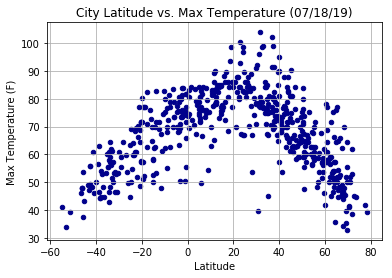

In [9]:
ax1 = weather_data.plot.scatter(x='Lat', y='Max Temp', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/Lat_vs_Temp.png', bbox_inches="tight")

#### Latitude vs. Humidity Plot

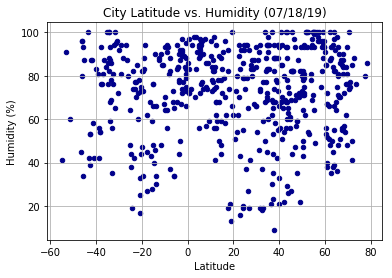

In [10]:
ax1 = weather_data.plot.scatter(x='Lat', y='Humidity', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Humidity (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Lat_vs_Humidity.png', bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

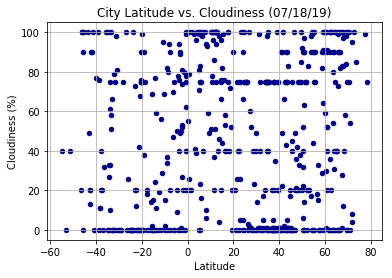

In [11]:
ax1 = weather_data.plot.scatter(x='Lat', y='Cloudiness', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/Lat_vs_Cloudiness.png', bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

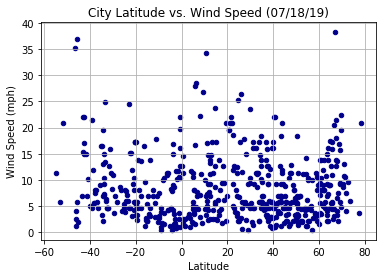

In [12]:
ax1 = weather_data.plot.scatter(x='Lat', y='Wind Speed', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/Lat_vs_WindSpeed.png', bbox_inches="tight")